<div class="alert alert-info">
В блоках голубого цвета указаны комментарии преподавателя
    </div>

In [1]:
!pip install catboost
!pip install lightgbm

In [2]:
import warnings
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt


from os.path import join
from IPython import display
from sklearn.datasets import load_digits

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, rand_score, adjusted_rand_score,  mutual_info_score, adjusted_mutual_info_score, homogeneity_completeness_v_measure, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, f1_score, accuracy_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans, AgglomerativeClustering

from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split

from tqdm import tqdm
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

from IPython.display import Image, display

In [3]:
DATA_PATH = "/home/elvira/BLASTIM_ML_ON_PYTHON/flow_cyt_project"
plt.rcParams["figure.figsize"] = 12, 9
sns.set_style("whitegrid")
warnings.filterwarnings("ignore")

SEED = 111
random.seed(SEED)
np.random.seed(SEED)

### Задание 1. Подбираем лучшую иерархическую кластеризацию

5 баллов

<div class="alert alert-info">
    Перед тем, как начинать работу с реальными данными, я предлагаю потренироваться работать с кластеризацией и поизучать различные гиперпараметры. На лекции были рассмотрены различные расстояния, которые могут служить метриками различия между объектами. Также мы разобрали несколько алгоритмов кластеризации, в том числе и иерархическую. Часто может быть непонятно, какой алгоритм и какую метрику расстояния нужно взять. Давайте упростим себе жизнь и напишем функцию `algorithm_selection`, которая будет на основании переданных ей:

* метрик расстояния (можно брать все, что было на лекциях, минимум 4)
* параметра `linkage` ('average', 'single', 'complete')
* и метрик качества кластеризации ('Homogeneity', 'Completeness', 'V-measure', 'Silhouette')

будет выводить итоговую таблицу, в которую войдут столбцы:
* distance (метрика расстояния)
* linkage (алгоритм иерархической кластеризации)
* homogenity
* completeness
* v_measure
* silhouette

В результате по этой таблице, нужно сделать вывод о том, какой алгоритм кластеризации и с какими гиперпараметрами лучше всего сработал.

Часть моментов мы не разбирали на лекции, поэтому вам нужно самим разобрать в них перед тем, как начинать делать данное задание.
    </div>

<div class="alert alert-info">
    Загрузим наши данные:
    </div>

In [4]:
data = load_digits()
X, y = data.data, data.target

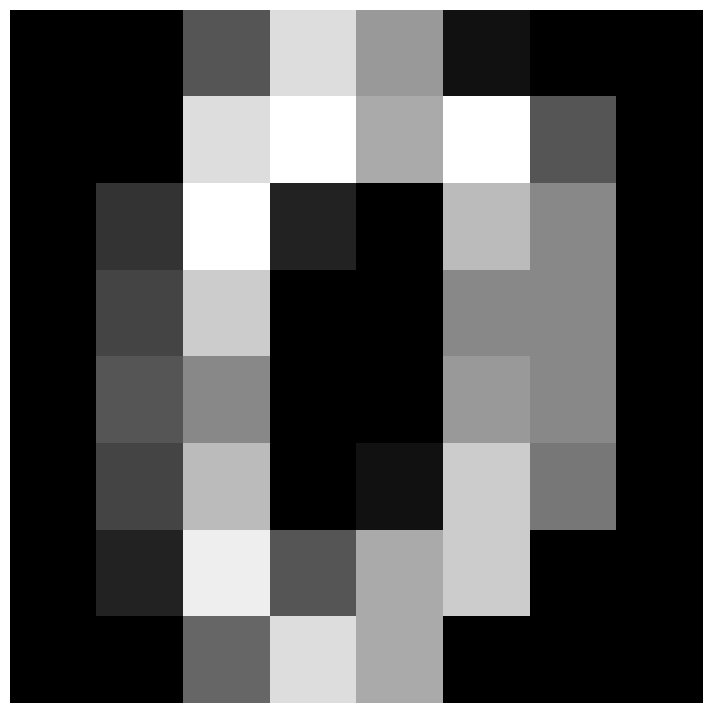

In [5]:
plt.imshow(X[0].reshape(8, 8).astype(int), cmap="gray")
plt.axis("off");

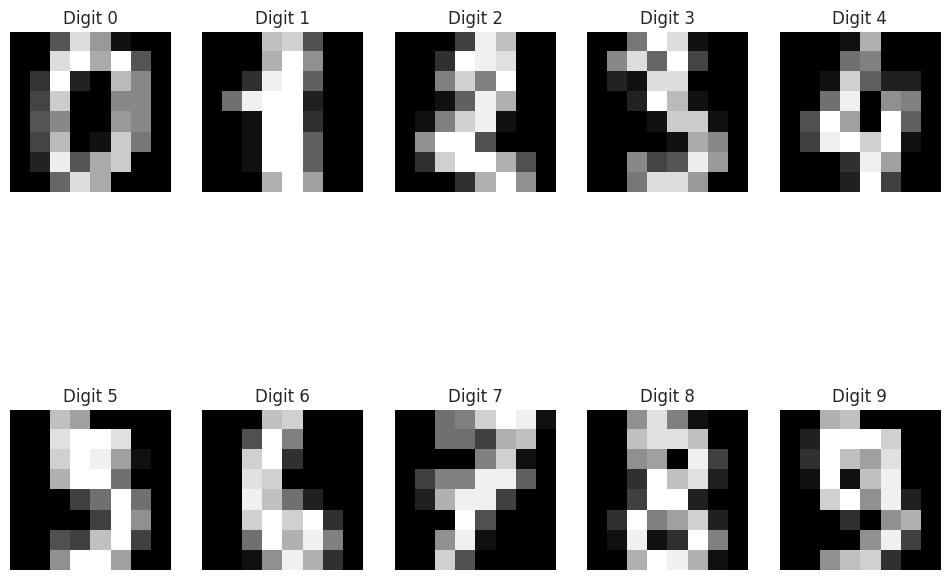

In [6]:
fig, axs = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)

for i, dig in enumerate(np.unique(y)):
    img = X[y==dig][0].reshape(8, 8).astype(int)  # Выбираем первое изображение для каждой цифры
    axs.flatten()[i].imshow(img, cmap='gray')
    axs.flatten()[i].set_title("Digit " + str(dig))
    axs.flatten()[i].axis("off")


<div class="alert alert-info">
    Работать будем с изображениями рукописных цифр. Каждая картинка представлена вектором из 64 элементов (числа от 0 до 255). Чтобы ее нарисовать мы должны сделать `reshape` в картинку 8 на 8 пикселей. Вам нужно будет выбрать наилучший способ кластеризации при помощи функции `algorithm_selection`, которую вы реализуете. Для некоторых метрик кластеризации требуются метки **классов** объектов (они хранятся в переменной `y`). Укажите для каждого алгоритма число кластеров равное количеству классов в `y`.
    </div>

In [7]:
def algorithm_selection(X, distances, algorithms, metrics):
    """
    Для заданных алгоримов кластеризации и гиперпараметров
    считает различные метрики кластеризации
        :param X: наши данные (n_samples, n_features)
        :param distances: список возможных метрик расстояния ('euclidean', 'manhattan', 'l1', 'l2', 'cosine', 'chebyshev', 'minkowski', 'canberra')
        :param algorithm: параметр linkage ('average', 'single', 'complete')
        :param metrics: список возможных метрик качества кластеризации ('Homogeneity', 'Completeness', 'V-measure', 'Silhouette')
    :return compare_dataframe: таблица с метриками кластеризации
    """

    compare_dic = {"distance": [], "linkage": [], "homogenity": [], "completeness": [], "v_measure": []}

    """
    YOUR TURN TO CODE:
    """

    compare_dataframe = pd.DataFrame(compare_dic)

    return compare_dataframe

In [8]:
def algorithm_selection(X, distances, algorithms, metrics):
    compare_dic = {"distance": [], "algorithm": [], "homogeneity": [], "completeness": [], "v_measure": [], "silhouette": []}

    for dist in distances:
        for algo in algorithms:
            if algo == 'kmeans':
                clustering = KMeans(n_clusters=len(np.unique(y)), random_state=SEED)
            elif algo == 'agglomerative':
                clustering = AgglomerativeClustering(n_clusters=len(np.unique(y)), linkage='ward')
            labels = clustering.fit_predict(X)

            homogenity = homogeneity_score(y, labels)
            completeness = completeness_score(y, labels)
            v_measure = v_measure_score(y, labels)
            silhouette = silhouette_score(X, labels)

            compare_dic["distance"].append(dist)
            compare_dic["algorithm"].append(algo)
            compare_dic["homogeneity"].append(homogenity)
            compare_dic["completeness"].append(completeness)
            compare_dic["v_measure"].append(v_measure)
            compare_dic["silhouette"].append(silhouette)

    compare_dataframe = pd.DataFrame(compare_dic)

    return compare_dataframe

# Используем функцию algorithm_selection
distances = ['euclidean', 'manhattan', 'l1', 'l2', 'cosine', 'chebyshev', 'minkowski', 'canberra']
algorithms = ['kmeans', 'agglomerative']
metrics = ['Homogeneity', 'Completeness', 'V-measure', 'Silhouette']

compare_results = algorithm_selection(X, distances, algorithms, metrics)

print(compare_results)

     distance      algorithm  homogeneity  completeness  v_measure  silhouette
0   euclidean         kmeans     0.741285      0.749949   0.745592    0.182412
1   euclidean  agglomerative     0.857513      0.879096   0.868170    0.178497
2   manhattan         kmeans     0.741285      0.749949   0.745592    0.182412
3   manhattan  agglomerative     0.857513      0.879096   0.868170    0.178497
4          l1         kmeans     0.741285      0.749949   0.745592    0.182412
5          l1  agglomerative     0.857513      0.879096   0.868170    0.178497
6          l2         kmeans     0.741285      0.749949   0.745592    0.182412
7          l2  agglomerative     0.857513      0.879096   0.868170    0.178497
8      cosine         kmeans     0.741285      0.749949   0.745592    0.182412
9      cosine  agglomerative     0.857513      0.879096   0.868170    0.178497
10  chebyshev         kmeans     0.741285      0.749949   0.745592    0.182412
11  chebyshev  agglomerative     0.857513      0.879

### Задание 2. Аннотация клеточных типов

суммарно 10 баллов

<div class="alert alert-info">
    В этом задании вам предстоит применять полученные знания о кластеризации для аннотации данных, полученных при помощи проточной цитометрии. Каждая строка в данных это одна клетка, столбцы **FSC-A**, **SSC-A** косвенным образом свидетельствуют о размере клеток, остальные показывают интенсивность флуоресценции различных поверхностных маркеров. Ваша задача определить для каждой клетки, к какому типу она относится.
    </div>

#### 2.1. EDA
<div class="alert alert-info">
1.5 балла

Проведите EDA:

1. Посмотрите на данные (можно попробовать метод `describe`)
2. Сколько у нас клеток / признаков
3. Постройте распределения каждого признака (есть ли очевинные выбросы?)
    </div>

In [9]:
fc_data = pd.read_csv(("flow_c_data.csv"), index_col=0)

In [10]:
fc_data.head()

,FSC-A,SSC-A,HLA-DR,CD3,CD45,CD14,CD56,CD19,CD11c
0,0.722199,0.154232,0.494449,0.512853,4.057328,1.019255,4.007273,-1.406912,0.384406
1,0.751073,0.114618,4.671924,0.822042,4.933149,0.159388,-0.216407,6.034845,0.577039
2,1.108188,0.150011,-0.422857,4.006353,5.616384,0.519223,0.783077,-0.318668,-0.493832
3,0.553310,0.119929,0.345968,3.332310,5.260935,1.481229,0.264846,0.694883,3.416960
4,0.774884,0.076984,4.984963,0.885501,4.562367,0.217117,0.086279,5.563345,0.471591


In [11]:
fc_data.describe()

,FSC-A,SSC-A,HLA-DR,CD3,CD45,CD14,CD56,CD19,CD11c
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.962458,0.165415,1.791579,3.280391,5.169845,1.097182,0.412223,1.219683,0.569898
std,0.500012,0.190773,2.027281,2.112079,0.518247,1.375876,1.176967,2.285305,1.502445
min,0.144786,0.021657,-7.634172,-2.517639,-8.329666,-8.833883,-12.358701,-9.640775,-11.085437
25%,0.798804,0.105550,0.275056,1.401943,4.922227,0.389746,-0.195978,-0.146948,-0.498781
50%,0.908574,0.130543,1.194313,4.373660,5.234119,0.672853,0.053267,0.244121,0.272297
75%,1.052034,0.162536,3.696976,4.842212,5.481218,1.065076,0.378576,0.908374,1.220576
max,42.954485,15.460997,12.946668,13.844391,13.710922,6.294236,6.461899,7.208721,6.840864


In [12]:
# получение информации о типах данных
fc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FSC-A   10000 non-null  float64
 1   SSC-A   10000 non-null  float64
 2   HLA-DR  10000 non-null  float64
 3   CD3     10000 non-null  float64
 4   CD45    10000 non-null  float64
 5   CD14    10000 non-null  float64
 6   CD56    10000 non-null  float64
 7   CD19    10000 non-null  float64
 8   CD11c   10000 non-null  float64
dtypes: float64(9)
memory usage: 781.2 KB


In [13]:
# подсчёт доли пропусков
fc_data.isna().mean()

FSC-A     0.0
SSC-A     0.0
HLA-DR    0.0
CD3       0.0
CD45      0.0
CD14      0.0
CD56      0.0
CD19      0.0
CD11c     0.0
dtype: float64

Пропуски отсутствуют

In [14]:
# подсчет явных дубликатов
fc_data.duplicated().sum()

0

Дубликаты в данных не обнаружены

In [15]:
# Определяем количество клеток и признаков
num_cells, num_features = fc_data.shape
print(f"Количество клеток: {num_cells}")
print(f"Количество признаков: {num_features}")

Количество клеток: 10000
Количество признаков: 9


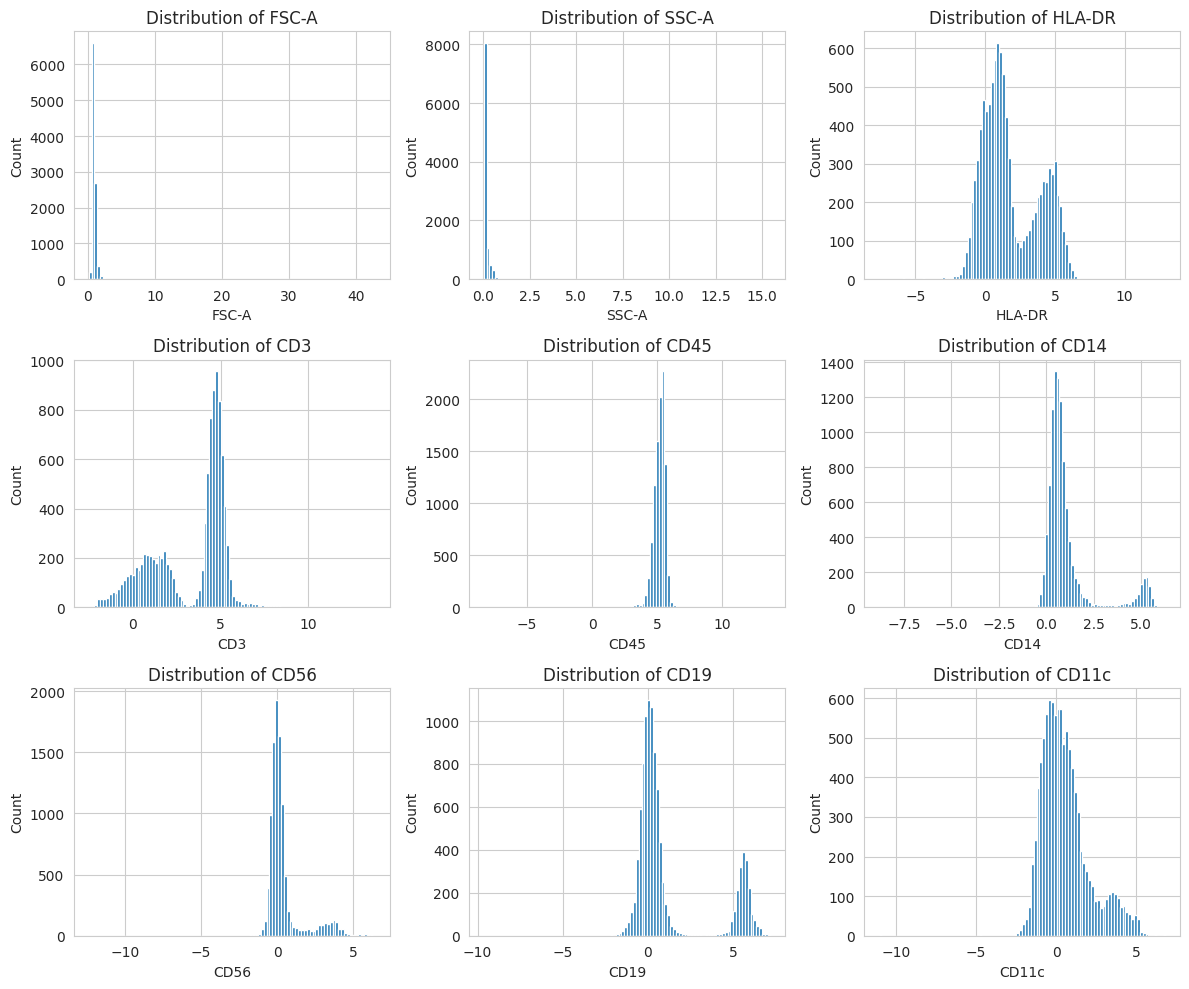

In [16]:
# Построим распределения каждого признака
numeric_features = ['FSC-A', 'SSC-A', 'HLA-DR', 'CD3', 'CD45', 'CD14', 'CD56', 'CD19', 'CD11c']

# Определим количество графиков в строке и столбце
num_rows = 3  # Количество строк
num_cols = 3  # Количество столбцов

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 10))

for i, feature in enumerate(numeric_features):
    row = i // num_cols  # Рассчитываем номер строки
    col = i % num_cols   # Рассчитываем номер столбца

    axes[row, col].hist(fc_data[feature], bins=100)
    axes[row, col].set_title(f"Distribution of {feature}")
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel("Count")

# Убираем пустые подграфики (если их количество меньше, чем num_rows * num_cols)
for i in range(len(numeric_features), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

# Убираем перекрывающиеся заголовки и метки осей
plt.tight_layout()

plt.show()

На графиках, визуализирующих данные FSC-A и SSC-A видны аномальные значения. Построим box-plot, чтобы посмотреть выбросы и их количество

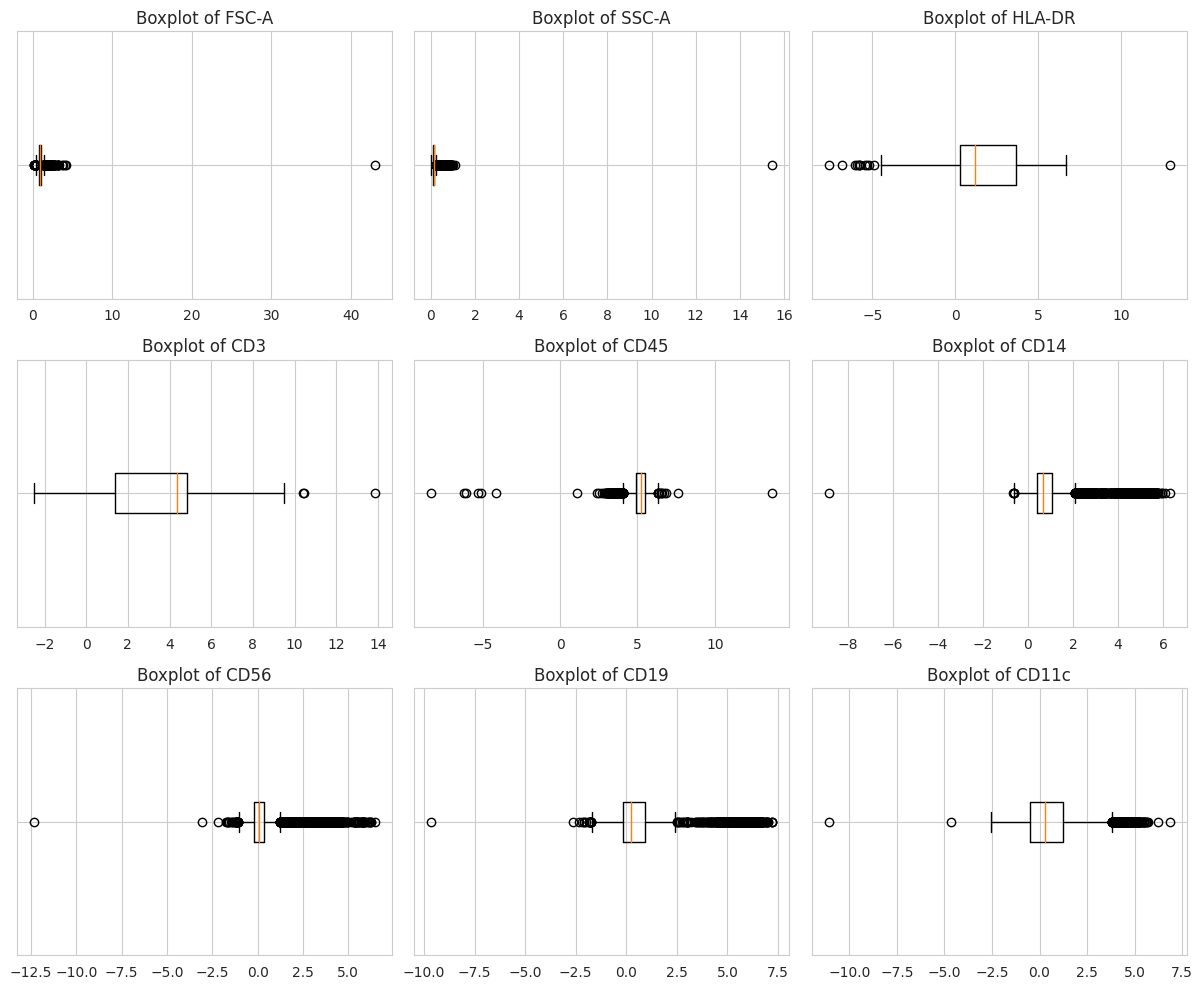

In [17]:
import matplotlib.pyplot as plt

# Список числовых признаков для построения боксплотов
numeric_features = ['FSC-A', 'SSC-A', 'HLA-DR', 'CD3', 'CD45', 'CD14', 'CD56', 'CD19', 'CD11c']

# Создаем фигуру для графиков
fig, axes = plt.subplots(3, 3, figsize=(12, 10))

# Перебираем числовые признаки и строим для каждого боксплот
for i, feature in enumerate(numeric_features):
    row = i // 3  # Номер строки (0, 1, или 2)
    col = i % 3   # Номер столбца (0, 1, или 2)

    # Строим боксплот
    axes[row, col].boxplot(fc_data[feature], vert=False)
    axes[row, col].set_title(f'Boxplot of {feature}')
    axes[row, col].set_yticklabels([])  # Убираем метки на оси Y

# Убираем пустые подграфики (если их количество меньше, чем 3x3)
for i in range(len(numeric_features), 3 * 3):
    row = i // 3
    col = i % 3
    fig.delaxes(axes[row, col])

# Убираем перекрывающиеся заголовки и метки осей
plt.tight_layout()

# Показываем графики
plt.show()

На графиках, визуализирующих данные FSC-A и SSC-A видны явные единичные выбросы. Очистим датафрейм от данных выбросов.
Укажем условие, что данные в колонке FSC-A должны быть меньше 40, а данные в колонке SSC-A - меньше 15.

In [18]:
fc_data = fc_data.query('`FSC-A` < 40 and `SSC-A` < 15')
fc_data

,FSC-A,SSC-A,HLA-DR,CD3,CD45,CD14,CD56,CD19,CD11c
0,0.722199,0.154232,0.494449,0.512853,4.057328,1.019255,4.007273,-1.406912,0.384406
1,0.751073,0.114618,4.671924,0.822042,4.933149,0.159388,-0.216407,6.034845,0.577039
2,1.108188,0.150011,-0.422857,4.006353,5.616384,0.519223,0.783077,-0.318668,-0.493832
3,0.553310,0.119929,0.345968,3.332310,5.260935,1.481229,0.264846,0.694883,3.416960
4,0.774884,0.076984,4.984963,0.885501,4.562367,0.217117,0.086279,5.563345,0.471591
...,...,...,...,...,...,...,...,...,...
9995,1.180762,0.441445,2.437344,1.526085,4.455114,4.880495,0.347480,-0.591343,2.857737
9996,0.768279,0.111863,0.812236,4.254496,5.008437,1.303261,-0.130244,0.344169,-0.626795
9997,1.314964,0.233584,4.144130,1.311947,5.340263,1.598675,-0.287353,-0.887078,4.369294
9998,0.894135,0.137300,-0.226186,0.246804,4.430212,0.457881,2.404284,-0.112999,0.069239


Данные одной клетки были вычищены из исходного датафрейма. Построим box-plot с учетом чистки данных

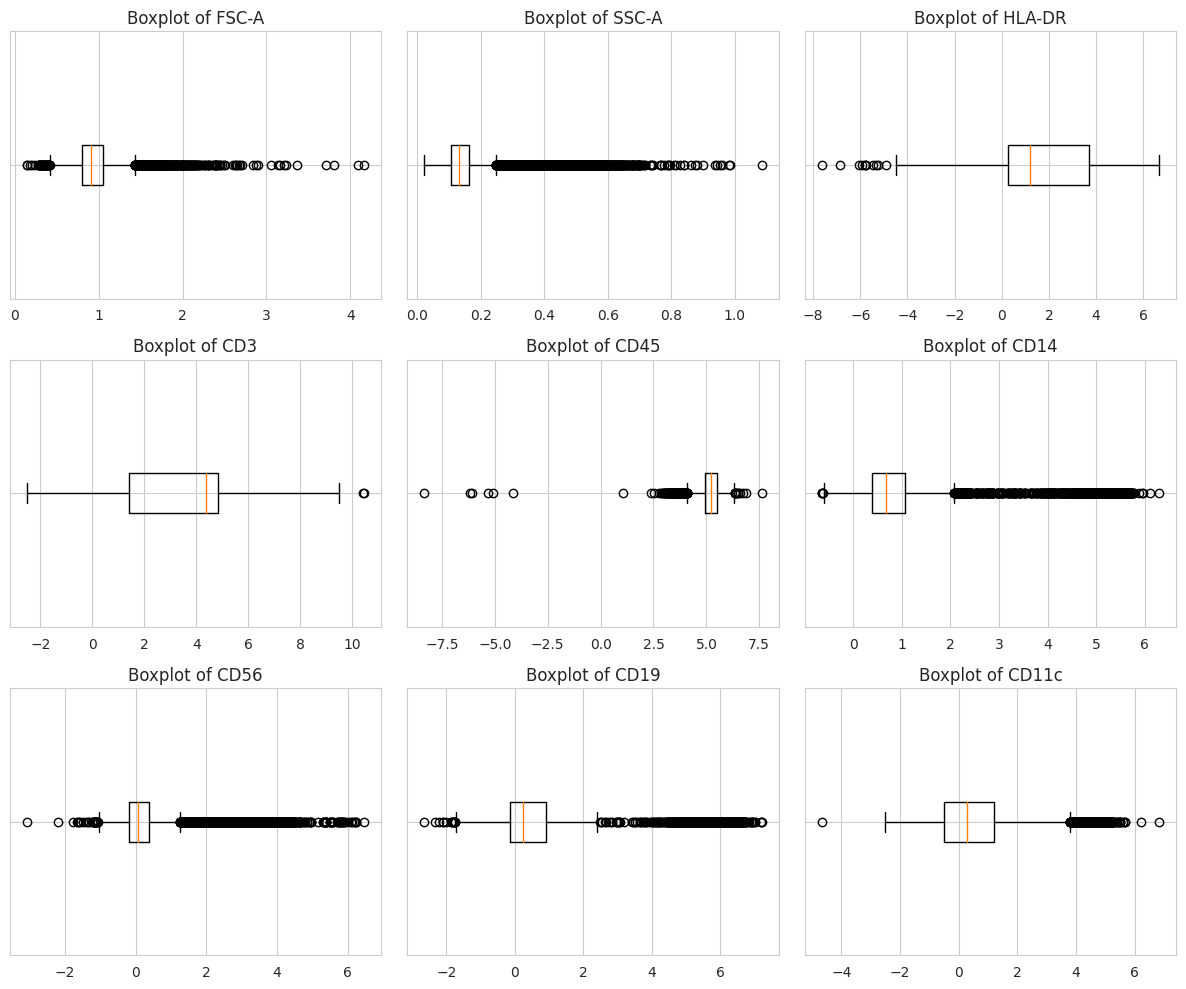

In [19]:
import matplotlib.pyplot as plt

# Список числовых признаков для построения боксплотов
numeric_features = ['FSC-A', 'SSC-A', 'HLA-DR', 'CD3', 'CD45', 'CD14', 'CD56', 'CD19', 'CD11c']

# Создаем фигуру для графиков
fig, axes = plt.subplots(3, 3, figsize=(12, 10))

# Перебираем числовые признаки и строим для каждого боксплот
for i, feature in enumerate(numeric_features):
    row = i // 3  # Номер строки (0, 1, или 2)
    col = i % 3   # Номер столбца (0, 1, или 2)

    # Строим боксплот
    axes[row, col].boxplot(fc_data[feature], vert=False)
    axes[row, col].set_title(f'Boxplot of {feature}')
    axes[row, col].set_yticklabels([])  # Убираем метки на оси Y

# Убираем пустые подграфики (если их количество меньше, чем 3x3)
for i in range(len(numeric_features), 3 * 3):
    row = i // 3
    col = i % 3
    fig.delaxes(axes[row, col])

# Убираем перекрывающиеся заголовки и метки осей
plt.tight_layout()

# Показываем графики
plt.show()

Очевидных выбросов в данных не видно.

#### 2.2. Кластеризация

4.5 балла

<div class="alert alert-info">
    При ручной аннотации клеточных типов обычно поступают следующим образом:

1. При помощи методов понижения размерности рисуют наши наблюдения, чтобы примерно оценить число клеточных типов
2. Проводят кластеризацию наблюдений (для некоторых методов нужно заранее задать число кластеров, поэтому нам как раз помогает п.1)
3. Далее мы считаем, что клетки, которые алгоритм отнес к одному кластеру являются одним клеточным типом (если кластеров больше, чем типов клеток, то возможно, что 2 разных кластера являются одним типом)
4. После чего по интенсивности экспрессии поверхностных маркеров мы присваиваем кластеру клеточный тип
    </div>

<div class="alert alert-info">
    Давайте для начала напишем удобную функцию для визуализации наших многомерных данных в пространстве размерностью 2, делать мы это будем при помощи алгоритма t-SNE (при желании можно также воспользоваться UMAP, но для него необходимо устанавливать дополнительную [библиотеку](https://umap-learn.readthedocs.io/en/latest/)).
    </div>

<div class="alert alert-info">
    Поиграться с красивой визуализацией можно [тут](https://distill.pub/2016/misread-tsne/).
    </div>

In [20]:
def plot_tsne(data, n_iter=1000,
              perplexity=40, color=None):
    """
    Функция для отрисовки результатов работы t-SNE
        :param data: таблица объекты х признаки
        :param n_iter: число итераций градиентного спуска,
            может быть полезно увеличить, чтобы получить результаты получше
        :param perplexity: число соседей
        :param color: np.array[n_samples] с переменной,
            которой мы хотим покрасить наши наблюдения
        :return tsne_emb: np.array[n_samples, 2] - результаты работы t-SNE
    """

    # Сначала сделаем PCA, так как это хорошее начальное приближение для t-SNE
    # позволит алгоритму быстрее сойтись
    pca = PCA().fit(data)
    pca_embedding = pca.transform(data)


    # Запустим t-SNE, он выдаст нам для каждого объекта по 2 числа,
    # которые мы сможем нарисовать
    tnse = TSNE(n_components=2, init=pca_embedding[:, :2], n_jobs=-1,
                n_iter=n_iter, perplexity=perplexity, random_state=SEED)
    tsne_embedding = tnse.fit_transform(pca_embedding)

    sns.scatterplot(x=tsne_embedding[:, 0],
                    y=tsne_embedding[:, 1],
                    hue=color, palette="colorblind")
    plt.xlabel("$TSNE_1$", fontsize=18)
    plt.ylabel("$TSNE_2$", fontsize=18)

    # Вернем также результаты t-SNE, так как, если потом захотим перестроить картинку,
    # в таком случае нам не придется ждать заново, просто нарисуем новую с готовыми данными

    return tsne_embedding

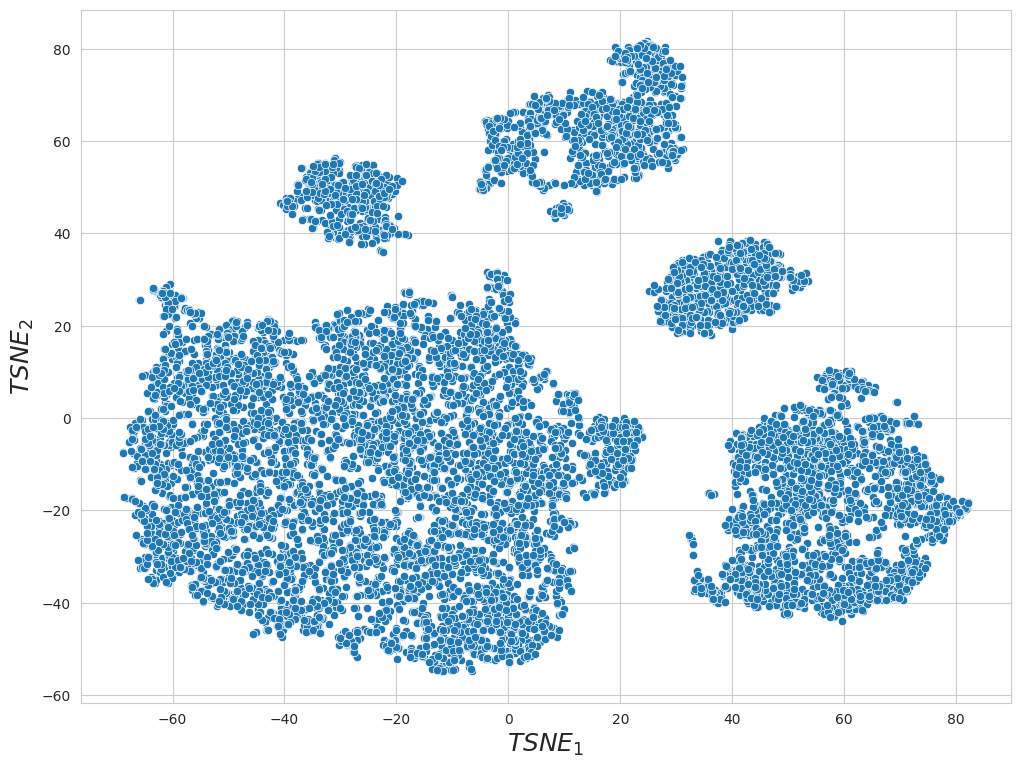

In [21]:
tsne_embedding_2D = plot_tsne(fc_data)

In [22]:
def plot_tsne_3D(data, n_iter=1000,
              perplexity=40, color=None):
    """
    Функция для отрисовки результатов работы t-SNE
        :param data: таблица объекты х признаки
        :param n_iter: число итераций градиентного спуска,
            может быть полезно увеличить, чтобы получить результаты получше
        :param perplexity: число соседей
        :param color: np.array[n_samples] с переменной,
            которой мы хотим покрасить наши наблюдения
        :return tsne_emb: np.array[n_samples, 2] - результаты работы t-SNE
    """
    # Сначала сделаем PCA, так как это хорошее начальное приближение для t-SNE
    # позволит алгоритму быстрее сойтись
    pca = PCA().fit(data)
    pca_embedding = pca.transform(data)


    # Запустим t-SNE, он выдаст нам для каждого объекта по 2 числа,
    # которые мы сможем нарисовать
    tnse = TSNE(n_components=3, init=pca_embedding[:, :3], n_jobs=-1,
                n_iter=n_iter, perplexity=perplexity, random_state=SEED)
    tsne_embedding = tnse.fit_transform(pca_embedding)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection = '3d')

    ax.set_xlabel("$TSNE_1$", fontsize=18)
    ax.set_ylabel("$TSNE_2$", fontsize=18)
    ax.set_zlabel("$TSNE_3$", fontsize=18)

    ax.scatter(tsne_embedding[:, 0],
               tsne_embedding[:, 1],
               tsne_embedding[:, 2],
               c=color, cmap="Pastel1")

    plt.show()

    # Вернем также результаты t-SNE, так как, если потом захотим перестроить картинку,
    # в таком случае нам не придется ждать заново, просто нарисуем новую с готовыми данными

    return tsne_embedding

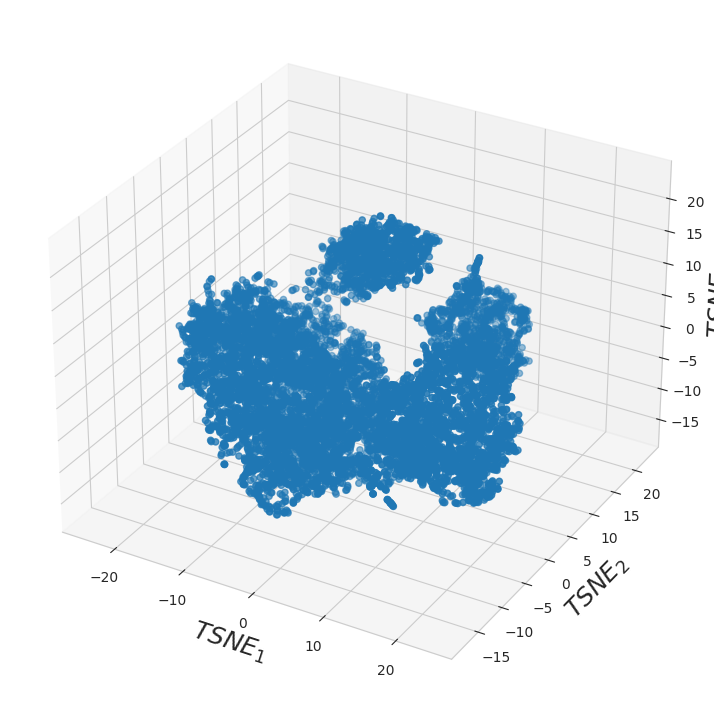

In [23]:
# %matplotlib notebook - to activate interactive 3D
tsne_embedding_3D = plot_tsne_3D(fc_data)

<div class="alert alert-info">
    Кластеризуйте ваши данные:

1. Попробуйте методы кластеризации из тех, что мы прошли
2. Выберите лучший на основании метрики `silhouette_score` (попробуйте также подобрать гиперпараметры)
3. Присвойте каждому наблюдению метку класса и нарисуйте график t-SNE, покрасив точки метками кластера
    </div>

<div class="alert alert-info">
    Например, в случае `KMeans` это можно сделать следующим образом:
    </div>

# Кластеризация данных

## KMeans

In [24]:
kmeans = KMeans(n_clusters=4, random_state=SEED).fit(fc_data)
pred_labels = kmeans.predict(fc_data)

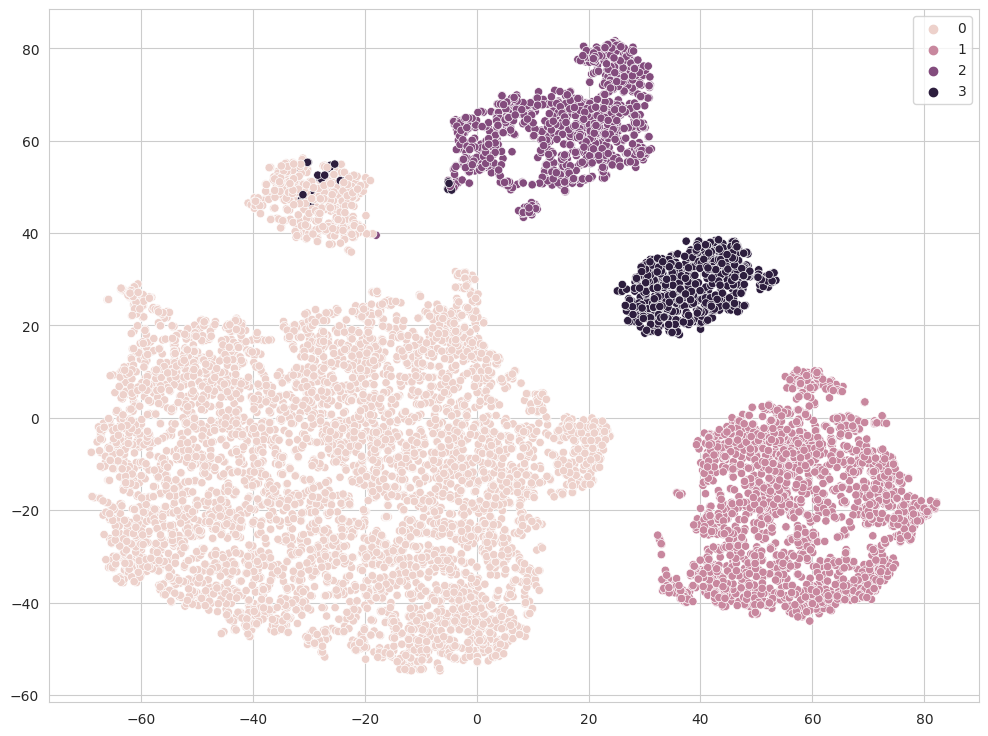

In [25]:
sns.scatterplot(x=tsne_embedding_2D[:, 0],
                y=tsne_embedding_2D[:, 1],
                hue=pred_labels);

In [26]:
print(f"Silhouette Score: {silhouette_score(fc_data, pred_labels)}")

Silhouette Score: 0.61110038397796


<div class="alert alert-info">
    Теперь попробуйте другие методы кластеризации, которые мы прошли (или которые вы хотите сами).
    </div>

## DBSCAN

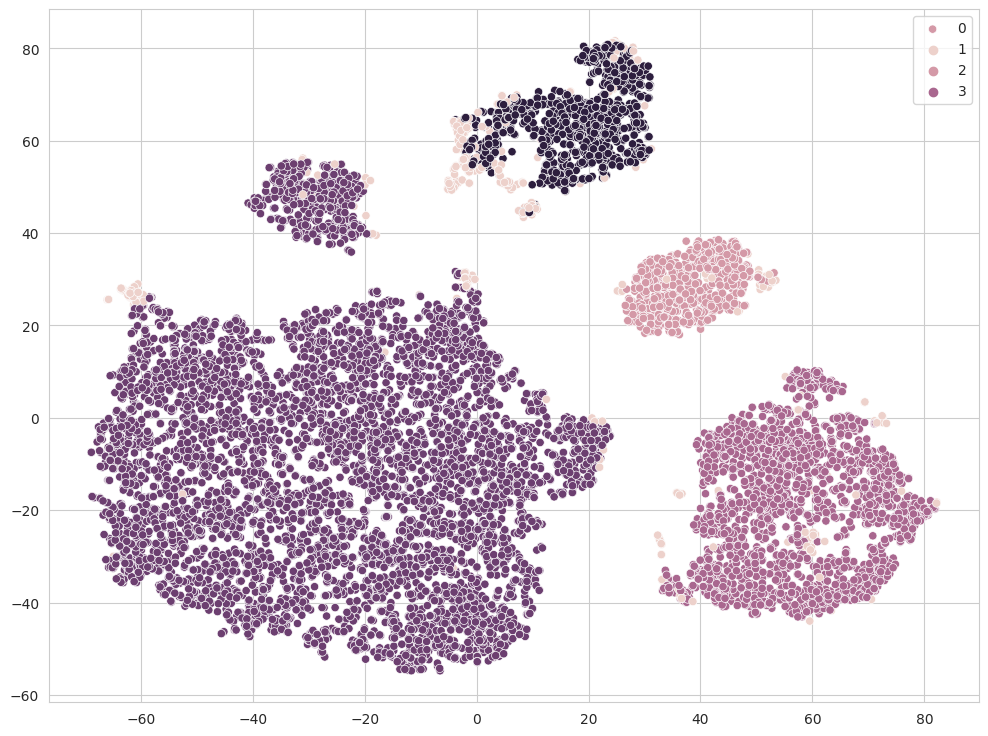

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=35)
cluster_labels = dbscan.fit_predict(fc_data)

# Строим график
sns.scatterplot(x=tsne_embedding_2D[:, 0], y=tsne_embedding_2D[:, 1], hue=cluster_labels)

# Настраиваем легенду
legend_labels = ['0', '1', '2', '3']
plt.legend(legend_labels, loc='upper right')

plt.show()

In [28]:
print(f"Silhouette Score: {silhouette_score(fc_data, cluster_labels)}")

Silhouette Score: 0.5818244697150579


## Иерархическая кластеризация

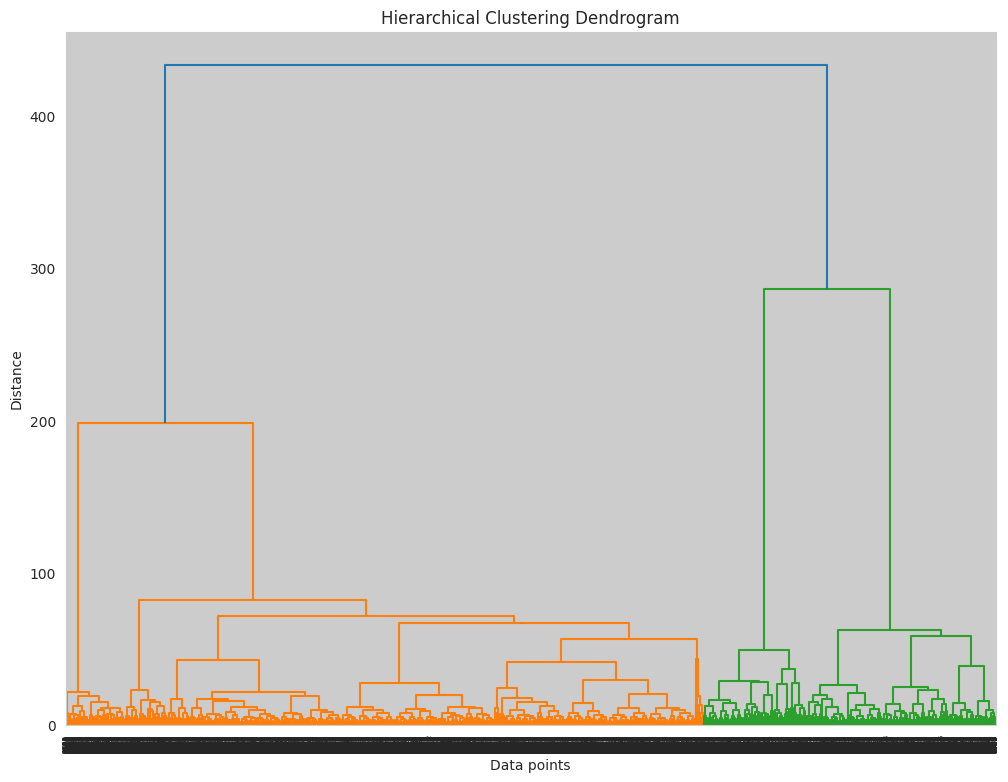

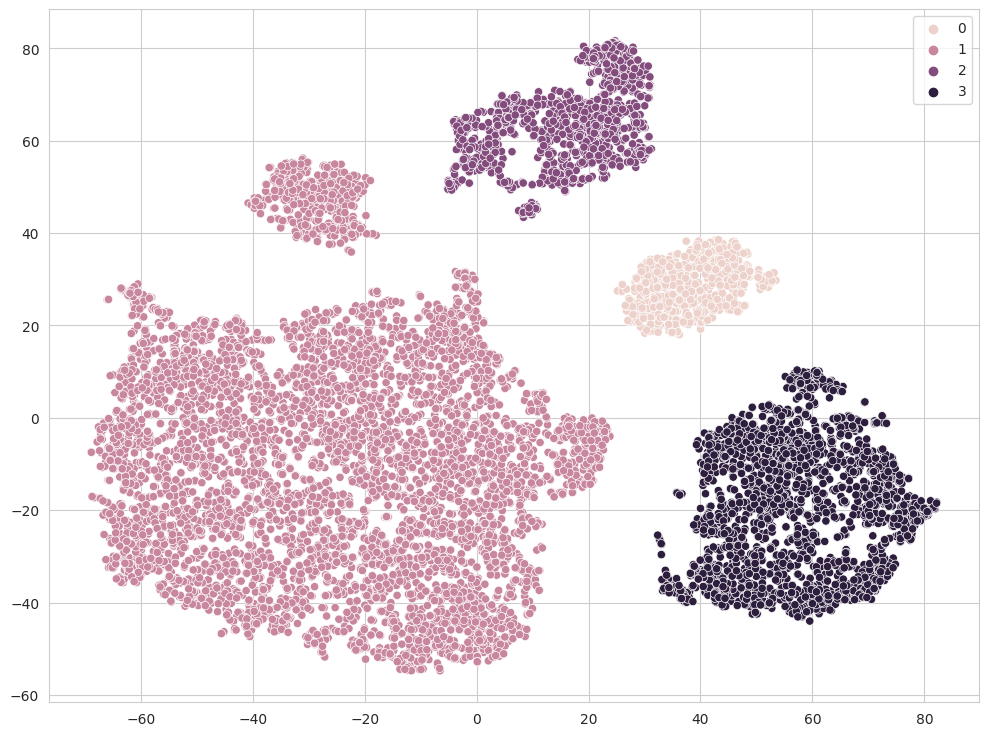

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Выполняем иерархическую кластеризацию
Z = linkage(fc_data, method='ward')  # Выбор метода и метрики для кластеризации

# Строим дендрограмму
dendrogram(Z, p=4)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()

# Определяем количество кластеров с помощью "cut-off" на дереве
threshold = 4  # порог отсечения
clusters = fcluster(Z, threshold, criterion='maxclust')  - 1

# Визуализируем результаты
sns.scatterplot(x=tsne_embedding_2D[:, 0],
                y=tsne_embedding_2D[:, 1],
                hue=clusters);

In [30]:
print(f"Silhouette Score: {silhouette_score(fc_data, clusters)}")

Silhouette Score: 0.6122484633811892


<div class="alert alert-info">
    Удалось ли вам получить ситуацию, где отдельные группы точек покрашены в один цвет?
    </div>

Покрасить отдельные группы точек в один цвет удалось с помощью иерархической кластеризации

# Аннотация клеточных типов

4 балла

<div class="alert alert-info">
    Теперь когда мы подобрали хороший алгоритм кластеризации, можно аннотировать наши клетки. Для этого мы нарисуем t-SNE и покрасим точки в зависимости от интенсивности экспрессии поверхностных маркеров. В датасете присутствуют следующие типы клеток:

* B_cells
* T_cells
* Monocytes
* Other cells

Вам нужно будет выяснить, какие клетки экспрессируют определенные маркеры и присвоить каждому кластеру один из типов клеток.
    </div>

<div class="alert alert-info">
    Для начала нарисуем все это безобразие:
    </div>

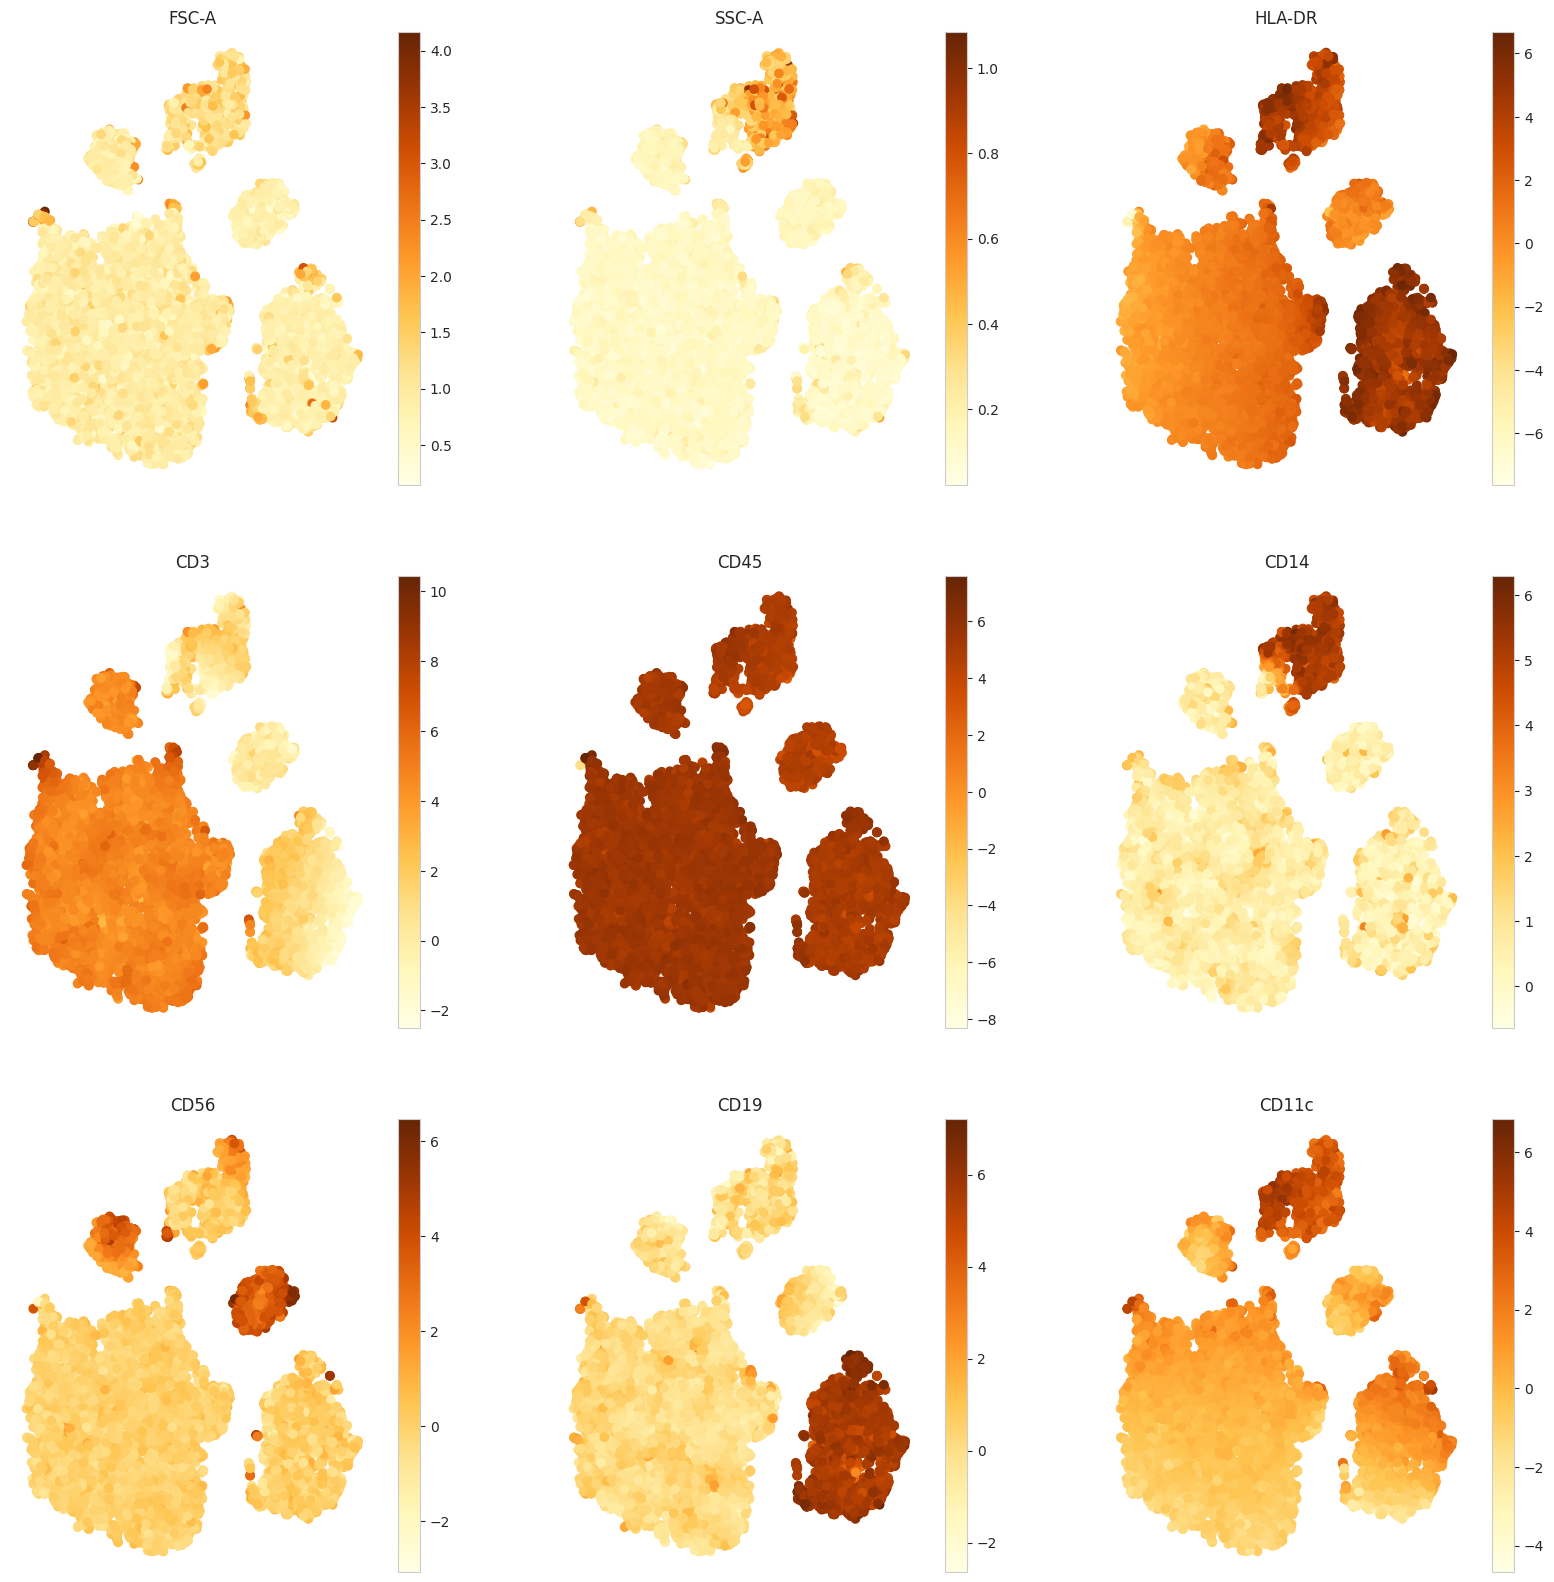

In [31]:
# Результаты t-SNE уже есть в переменной tsne_res
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
for col, ax in zip(fc_data.columns, axes.ravel()):
    scatter = ax.scatter(tsne_embedding_2D[:, 0], tsne_embedding_2D[:, 1],
                         c=fc_data[col], cmap="YlOrBr")
    fig.colorbar(scatter, ax=ax)
    ax.set_title(col)
    ax.grid(False)
    ax.axis("off")

<div class="alert alert-info">
    Вам необходимо узнать, какие маркеры характерны для каких типов клеток, и в зависимости от этого проаннотировать кластера.
    </div>

Характерные маркеры:
* CD19 - B-cells
* CD3  - T-cells
* CD14 - Monocytes

<div class="alert alert-info">
    Дальше дело за вами, нужно определить клеточный тип для каждого кластера и записать их как значения в словаре
    </div>

In [32]:
cell_type_cluster_map = {0: "T-cells",
                         1: "B-cells",
                         2: "Other",
                         3: "Monocetes"}

In [33]:
labels_of_best_clustering = clusters

In [34]:
labeled_fc_data = fc_data.assign(Population=labels_of_best_clustering)
labeled_fc_data["Population"] = labeled_fc_data["Population"].map(cell_type_cluster_map)

<div class="alert alert-info">
    Посчитайте, как распределены типы клеток:
    </div>

In [35]:
labeled_fc_data["Population"].value_counts()

B-cells      6230
Monocetes    2035
Other        1099
T-cells       635
Name: Population, dtype: int64

имеется явный дисбаланс данных

In [36]:
# подсчет доли каждого типа клеток
print(labeled_fc_data["Population"].value_counts(normalize=True))

B-cells      0.623062
Monocetes    0.203520
Other        0.109911
T-cells      0.063506
Name: Population, dtype: float64


# Атоматическая аннотация

5 баллов

<div class="alert alert-info">
    Вам нужно построить классификатор клеточных типов на основе размеченных вами данных. Мы с вами прошли много моделей, поэтому попробуйте как можно больше, а также поразбирайтесь с подбором гиперпараметров.

Подумайте о том, какая стратегия валидации модели здесь подойдет. Не забывайте, что когда вы подбираете гиперпараметры, то лучше это делать на кросс валидации, а также оставлять еще один набор данных в качестве итогового теста.

Оцените качество полученной модели при помощи `f1_score(average="macro")`. Попробуйте его улучшить, каким-то образом поработав с дисбалансом классов ([помощь](https://elitedatascience.com/imbalanced-classes)).
    </div>

## Подготовка данных для классификации:
Выделяем признаки (поверхностные маркеры) и целевую переменную (тип клеток).
Разделим данные на обучающую (60%), валидационную (20%) и тестовую (20%) выборки:

## Разделение данных на выборки

In [37]:
# разделение данных на обучающую, валидационную и тестовую выборки
labeled_fc_data_train, labeled_fc_data_test = train_test_split(labeled_fc_data, train_size=0.6, test_size=0.4, random_state=SEED)
labeled_fc_data_test, labeled_fc_data_valid = train_test_split(labeled_fc_data_test, test_size=0.5, random_state=SEED)

In [38]:
print("Процент данных в обучающей выборке:", '{:.0%}'.format(len(labeled_fc_data_train)/len(labeled_fc_data)))
print("Процент данных в валидационной выборке", '{:.0%}'.format(len(labeled_fc_data_valid)/len(labeled_fc_data)))
print("Процент данных в тестовой выборке", '{:.0%}'.format(len(labeled_fc_data_test)/len(labeled_fc_data)))

Процент данных в обучающей выборке: 60%
Процент данных в валидационной выборке 20%
Процент данных в тестовой выборке 20%


In [39]:
# определение функции для создания переменных для признаков и целевого признака
def splitting_data(data, target_column):
    return data.drop(columns=[target_column], axis=1), data[target_column]

In [40]:
# cоздание переменных для признаков и целевого признака
features_train, target_train = splitting_data(labeled_fc_data_train, 'Population')
features_valid, target_valid = splitting_data(labeled_fc_data_valid, 'Population')
features_test, target_test = splitting_data(labeled_fc_data_test, 'Population')

In [41]:
# проверка суммы значений
print("Сумма значений новых выборок:", len(features_train) + len(features_valid) + len(features_test))
print("Количество значений исходной выборки:", len(labeled_fc_data))


Сумма значений новых выборок: 9999
Количество значений исходной выборки: 9999


## Обучение моделей без учета дисбаланса

### Дерево решений

In [42]:
def grid_search_cv(model, features_train, target_train, features_valid, parameters):

    grid = GridSearchCV(estimator=model, param_grid=parameters, cv=5, scoring='f1_macro',
                        n_jobs=-1, error_score='raise')
    grid.fit(features_train, target_train)
    predictions = grid.best_estimator_.predict(features_valid)

    f1 = f1_score(target_valid, predictions, average=None)

    print("F1:", f1)

    print("Параметры лучшей модели:", grid.best_params_)
    print()

In [43]:
model_DT = DecisionTreeClassifier(random_state=SEED)
parameters_DT = {'max_depth': list(range(1, 51))}

In [44]:
%%time
#обучение модели
grid_search_cv(model_DT, features_train, target_train, features_valid, parameters_DT)

F1: [0.99842891 0.99491094 1.         1.        ]
Параметры лучшей модели: {'max_depth': 5}

CPU times: user 447 ms, sys: 112 ms, total: 559 ms
Wall time: 8.04 s


### LightGBM

In [45]:
model_LGBM = LGBMClassifier(random_state=SEED)
parameters_LGBM = {'lgbmclassifier__num_leaves': list(range(50, 301, 50)),
                 'lgbmclassifier__learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5]
                  }

In [46]:
%%time
#обучение модели
grid_search_cv(model_LGBM, features_train, target_train, features_valid, parameters_LGBM)

[LightGBM] [Warning] Unknown parameter: lgbmclassifier__learning_rate
[LightGBM] [Warning] Unknown parameter: lgbmclassifier__num_leaves
[LightGBM] [Warning] Unknown parameter: lgbmclassifier__learning_rate
[LightGBM] [Warning] Unknown parameter: lgbmclassifier__num_leaves
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000484 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 5999, number of used features: 9
[LightGBM] [Info] Start training from score -0.476794
[LightGBM] [Info] Start training from score -1.579712
[LightGBM] [Info] Start training from score -2.202573
[LightGBM] [Info] Start training from score -2.769759
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

### CatBoost

In [47]:
model_CB = CatBoostClassifier(random_state=SEED, verbose = False, devices='0:1')
parameters_CB = {'max_depth': list(range(1, 10)),
                 'n_estimators': list(range(5, 51, 5))
                 }

In [48]:
%%time
#обучение модели
grid_search_cv(model_CB, features_train, target_train, features_valid, parameters_CB)

F1: [0.99960707 0.99872935 1.         1.        ]
Параметры лучшей модели: {'max_depth': 4, 'n_estimators': 25}

CPU times: user 3.42 s, sys: 389 ms, total: 3.8 s
Wall time: 2min 40s


## Итоги анализа и выбор лучшей модели

In [49]:
# итоги анализа моделей
results_analysis = pd.DataFrame({'F1_B-cells': [0.99842891, 0.99921384, 0.99960707],
    'F1_T-cells': [0.99491094, 1, 0.99872935],
    'F1_Monocytes': [1, 0.9976247, 1],
    'F1_Other': [1, 0.99595142, 1],
    'Время обучения (сек.)': [12.7, 87, 223],},
    index=['Дерево решений', 'LightGBM', 'CatBoost'])
display(results_analysis)

,F1_B-cells,F1_T-cells,F1_Monocytes,F1_Other,Время обучения (сек.)
Дерево решений,0.998429,0.994911,1.000000,1.000000,12.7
LightGBM,0.999214,1.000000,0.997625,0.995951,87.0
CatBoost,0.999607,0.998729,1.000000,1.000000,223.0


**Вывод**

Все модели показали высокую точность предсказания.
К недостаткам модели CatBoost можно отнести скорость обучения (3 мин. 43 сек.), относительно модели LightGBM (1 мин. 27 сек.) и Дерева решений (13 сек.)
В данном проекте выборка данных позволяет провести обучение на любой их трех моделей. Если данных будет значительно больше, то предпочтение стоит отдать более быстрым моделям (Дерево решений или LightGBM)

## Тестирование моделей

Протестируем все модели, поскольку у всех высокая точность предсказания.

### Дерево решений

In [50]:
model = DecisionTreeClassifier(max_depth=5, random_state=SEED)

print("Время обучения:")
%time model.fit(features_train, target_train)

print()
print("Время предсказания:")
%time predictions = model.predict(features_test)

print()
print(predictions)

Время обучения:
CPU times: user 32.5 ms, sys: 30 µs, total: 32.5 ms
Wall time: 35.5 ms

Время предсказания:
CPU times: user 2.28 ms, sys: 1 ms, total: 3.29 ms
Wall time: 3.17 ms

['Monocetes' 'B-cells' 'Monocetes' ... 'B-cells' 'B-cells' 'B-cells']


In [51]:
results = pd.concat([target_test.reset_index(drop=True), pd.DataFrame(predictions, columns=["predictions"])], axis=1)
results

,Population,predictions
0,Monocetes,Monocetes
1,B-cells,B-cells
2,Monocetes,Monocetes
3,Monocetes,Monocetes
4,B-cells,B-cells
...,...,...
1995,B-cells,B-cells
1996,B-cells,B-cells
1997,B-cells,B-cells
1998,B-cells,B-cells


In [52]:
report = classification_report(target_test, predictions, target_names=['B-cells', 'T-cells', 'Monocytes', 'Other'])
print(report)

              precision    recall  f1-score   support

     B-cells       1.00      1.00      1.00      1234
     T-cells       1.00      1.00      1.00       405
   Monocytes       0.98      1.00      0.99       226
       Other       0.99      0.99      0.99       135

    accuracy                           1.00      2000
   macro avg       0.99      1.00      0.99      2000
weighted avg       1.00      1.00      1.00      2000



### LightGBM

In [53]:
model = LGBMClassifier(learning_rate = 0.1, num_leaves=50, random_state=SEED)

print("Время обучения:")
%time model.fit(features_train, target_train)

print()
print("Время предсказания:")
%time predictions = model.predict(features_test)

print()
print(predictions)

Время обучения:
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000402 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 5999, number of used features: 9
[LightGBM] [Info] Start training from score -0.476794
[LightGBM] [Info] Start training from score -1.579712
[LightGBM] [Info] Start training from score -2.202573
[LightGBM] [Info] Start training from score -2.769759
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

In [54]:
results = pd.concat([target_test.reset_index(drop=True), pd.DataFrame(predictions, columns=["predictions"])], axis=1)
results

,Population,predictions
0,Monocetes,Monocetes
1,B-cells,B-cells
2,Monocetes,Monocetes
3,Monocetes,Monocetes
4,B-cells,B-cells
...,...,...
1995,B-cells,B-cells
1996,B-cells,B-cells
1997,B-cells,B-cells
1998,B-cells,B-cells


In [55]:
report = classification_report(target_test, predictions, target_names=['B-cells', 'T-cells', 'Monocytes', 'Other'])
print(report)

              precision    recall  f1-score   support

     B-cells       1.00      1.00      1.00      1234
     T-cells       1.00      1.00      1.00       405
   Monocytes       1.00      1.00      1.00       226
       Other       1.00      0.99      0.99       135

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



### CatBoost

In [56]:
model = CatBoostClassifier(max_depth=4, n_estimators=45, random_state=SEED)

print("Время обучения:")
%time model.fit(features_train, target_train)

print()
print("Время предсказания:")
%time predictions = model.predict(features_test)

print()
print(predictions)

Время обучения:
Learning rate set to 0.5
0:	learn: 0.3710395	total: 4.17ms	remaining: 184ms
1:	learn: 0.2031403	total: 7.51ms	remaining: 161ms
2:	learn: 0.1198756	total: 12.1ms	remaining: 169ms
3:	learn: 0.0742709	total: 16ms	remaining: 164ms
4:	learn: 0.0458558	total: 22.4ms	remaining: 180ms
5:	learn: 0.0297579	total: 26.1ms	remaining: 170ms
6:	learn: 0.0202883	total: 30.8ms	remaining: 167ms
7:	learn: 0.0140609	total: 34.2ms	remaining: 158ms
8:	learn: 0.0101621	total: 37.3ms	remaining: 149ms
9:	learn: 0.0075865	total: 44.4ms	remaining: 155ms
10:	learn: 0.0066338	total: 49.5ms	remaining: 153ms
11:	learn: 0.0057843	total: 53.9ms	remaining: 148ms
12:	learn: 0.0050020	total: 58.3ms	remaining: 143ms
13:	learn: 0.0039538	total: 62.2ms	remaining: 138ms
14:	learn: 0.0032940	total: 65.2ms	remaining: 130ms
15:	learn: 0.0029486	total: 68.6ms	remaining: 124ms
16:	learn: 0.0026426	total: 71.6ms	remaining: 118ms
17:	learn: 0.0024093	total: 74.4ms	remaining: 112ms
18:	learn: 0.0021307	total: 77.3ms	

In [57]:
results = pd.concat([target_test.reset_index(drop=True), pd.DataFrame(predictions, columns=["predictions"])], axis=1)
results

,Population,predictions
0,Monocetes,Monocetes
1,B-cells,B-cells
2,Monocetes,Monocetes
3,Monocetes,Monocetes
4,B-cells,B-cells
...,...,...
1995,B-cells,B-cells
1996,B-cells,B-cells
1997,B-cells,B-cells
1998,B-cells,B-cells


In [58]:
report = classification_report(target_test, predictions, target_names=['B-cells', 'T-cells', 'Monocytes', 'Other'])
print(report)

              precision    recall  f1-score   support

     B-cells       1.00      1.00      1.00      1234
     T-cells       1.00      1.00      1.00       405
   Monocytes       1.00      1.00      1.00       226
       Other       1.00      1.00      1.00       135

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



### Выводы

Модель Catboost с гиперпараметрами {'max_depth': 4, 'n_estimators': 25}, обученная на несбалансированных данных, смогла предсказать все типы клеток со 100% точностью.

## Борьба с дисбалансом

В связи с тем, что модель CatBoost, обученная на несбалансированных данных, cмогла предсказать все типы клеток со 100% точностью, борьба с дисбалансом является нецелесообразной.

# Общий вывод

В ходе работы было выполнено:

* Загружены, изучены и подготовлены данные. Выполнена проверка наличия нулевых и пропущенных значений, удалены очевидные выбросы;
* Был выявлен дисбаланс данных, однако при тестировании моделей было принято решение не проводить борьбу с дисбалансом;
* Произведена кластеризация данных с помощью KMeans, DBSCAN и Иерархической кластеризации. Лучшие результаты показала иерархическая кластеризация (Silhouette Score: 0.612). Помимо прочего с помощью нее получилось полностью покрасить кластеры в отдельные цвета.
* Данные были разделены на train, validation и test выборки, были обучены три модели: Дерево решений, LightGBM и CatBoost.
* В проверке на тестовой выборке модель CatBoost показала лучший результат и смогла предсказать все типы клеток со 100% точностью (без учета дисбаланса классов).